<a href="https://www.kaggle.com/code/fall2fire/deepfake-detection-96-accuracy?scriptVersionId=292917797" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Steps Required 
### 1.Importing Required Libaries
### 2.Data Visualization
### 3.Image Data preprocessing includes training validation splitting
### 4.CNN-Modeling
### 5.Evalation of Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models
import cv2

2026-01-20 12:45:13.247843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768913113.478474      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768913113.545749      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os

data_path = "/kaggle/input/deepfake-and-real-images"
print(os.listdir(data_path))

['Dataset']


In [3]:
inner_path = os.path.join(data_path, "Dataset")
print(os.listdir(inner_path))

['Validation', 'Test', 'Train']


# Visualization of Image Data

(256, 256, 3)


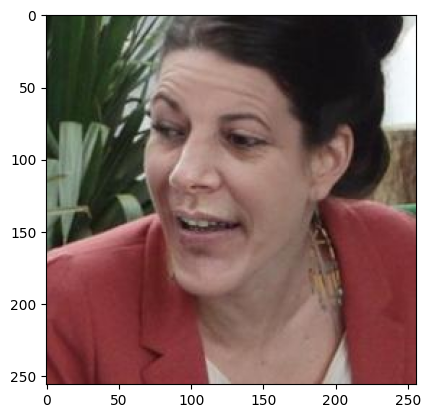

In [4]:
# Providing path to dataset
base_dir ='/kaggle/input/deepfake-and-real-images/Dataset/Train'
image_path='/kaggle/input/deepfake-and-real-images/Dataset/Train/Fake/fake_1001.jpg'

# Reading the image
img=mpimg.imread(image_path)
print(img.shape)

#display image
plt.imshow(img)
plt.axis()
plt.show()

# Data Preprocessing

In [5]:
img_size = 256
batch_size = 32


data_gen = ImageDataGenerator(
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=0.25, # 25% for Validation
    rescale=1./255
)



train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

valid_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 105002 images belonging to 2 classes.
Found 35000 images belonging to 2 classes.


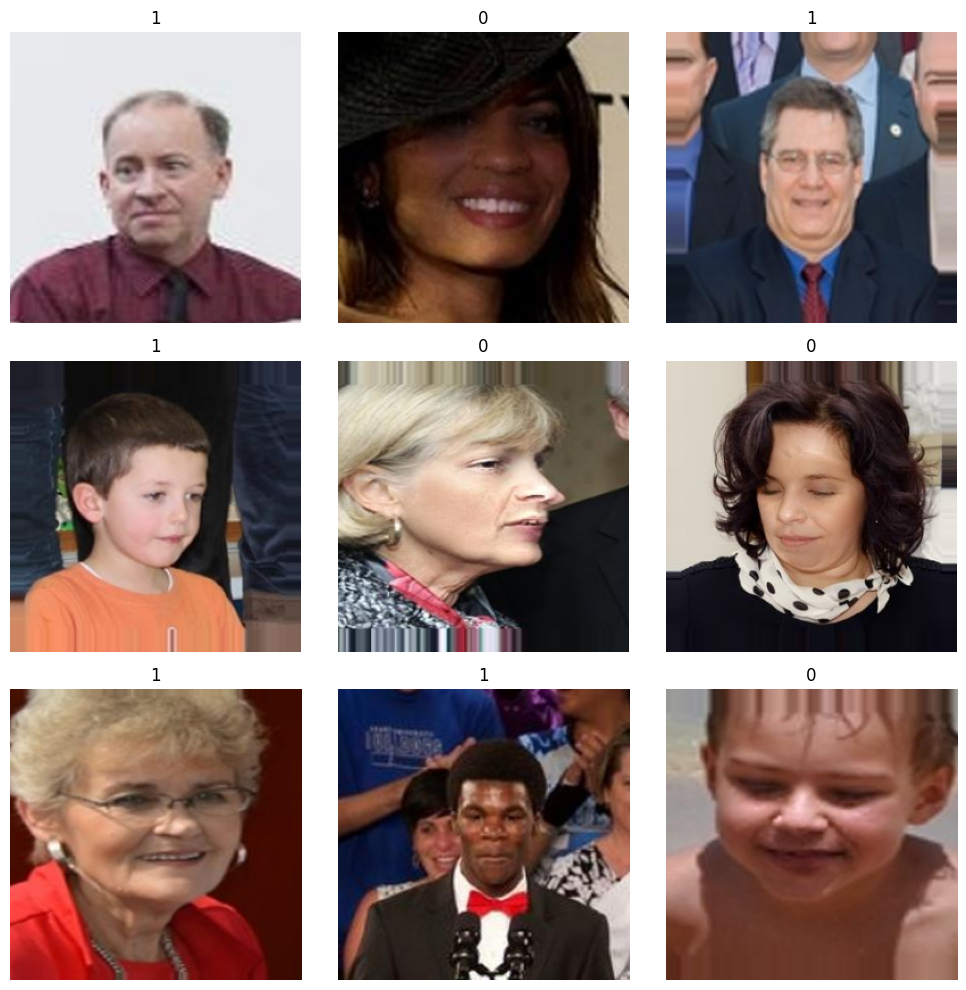

In [6]:
x_batch, y_batch = next(train_gen)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

# CNN Model

In [7]:
from tensorflow.keras import layers, models, optimizers

model = models.Sequential([
    layers.Conv2D(8, (3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='softmax') # you can use Sigmoid activation function as well
])

model.compile(optimizer=optimizers.Adam(learning_rate=3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_gen, validation_data=valid_gen, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1768913241.949763      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1768913241.950468      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can i

Epoch 1/5


I0000 00:00:1768913247.947040      82 service.cc:148] XLA service 0x7f68f000fe90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1768913247.948272      82 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1768913247.948296      82 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1768913248.367692      82 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/3282 ━━━━━━━━━━━━━━━━━━━━ 7:08:13 8s/step - accuracy: 0.3125 - loss: 0.7076

I0000 00:00:1768913252.201537      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2737s 832ms/step - accuracy: 0.7291 - loss: 0.5151 - val_accuracy: 0.9113 - val_loss: 0.2238
Epoch 2/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2185s 666ms/step - accuracy: 0.9088 - loss: 0.2231 - val_accuracy: 0.9332 - val_loss: 0.1626
Epoch 3/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2233s 680ms/step - accuracy: 0.9298 - loss: 0.1712 - val_accuracy: 0.9330 - val_loss: 0.1606
Epoch 4/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2199s 670ms/step - accuracy: 0.9398 - loss: 0.1491 - val_accuracy: 0.9418 - val_loss: 0.1442
Epoch 5/5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 2900s 883ms/step - accuracy: 0.9488 - loss: 0.1302 - val_accuracy: 0.9555 - val_loss: 0.1159


## Note: We can observe that the neural network will take a lot of time for training the model

# Evaluation of model

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Get true and predicted labels
Y_true = valid_gen.classes
Y_pred = np.argmax(model.predict(valid_gen), axis=1)

# Report
print(classification_report(Y_true, Y_pred, target_names=valid_gen.class_indices.keys()))

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 565s 516ms/step
              precision    recall  f1-score   support

        Fake       0.97      0.94      0.96     17500
        Real       0.94      0.97      0.96     17500

    accuracy                           0.96     35000
   macro avg       0.96      0.96      0.96     35000
weighted avg       0.96      0.96      0.96     35000



# ROC Curve

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 565s 516ms/step


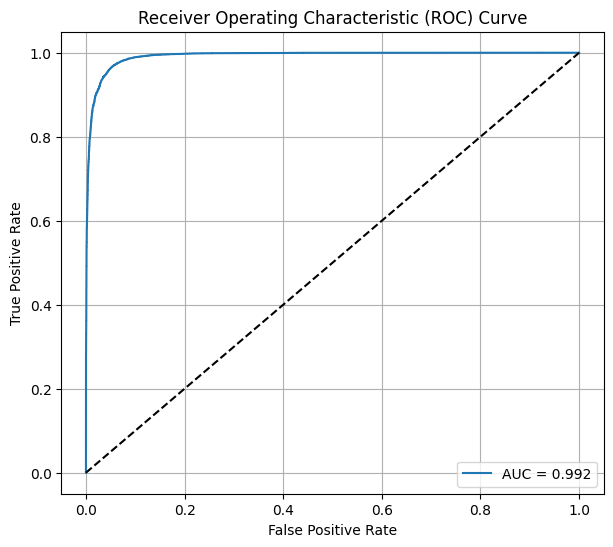

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

# True labels
Y_true = valid_gen.classes

# Predicted probabilities (for positive class)
Y_prob = model.predict(valid_gen)

# If model outputs two columns (softmax)
if Y_prob.shape[1] == 2:
    Y_prob = Y_prob[:, 1]  # use probability of class 1
else:
    Y_prob = Y_prob.ravel()  # sigmoid output case

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_true, Y_prob)
auc_score = roc_auc_score(Y_true, Y_prob)

# Plot ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Saving Model

In [10]:
model.save('dfd-model.h5')

# ~ For Live Demo Visit [Github]('https://github.com/Pranav-Uniyal/DeepFake_Detection')
